In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

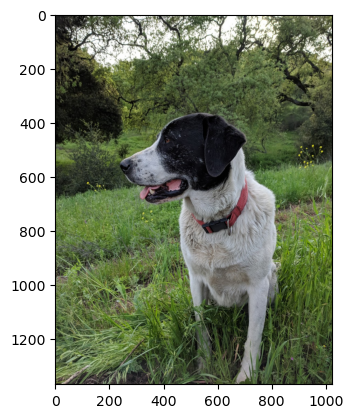

In [3]:
plt.imshow(full)
plt.show()

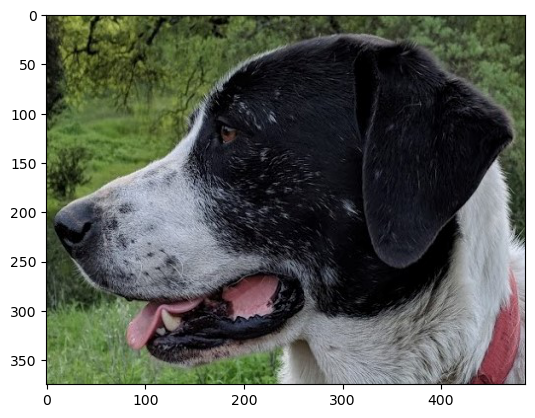

In [7]:
face = cv2.imread('face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)
plt.show()

In [8]:
full.shape, face.shape

((1367, 1025, 3), (375, 486, 3))

In [21]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [22]:
methods

['cv2.TM_CCOEFF',
 'cv2.TM_CCOEFF_NORMED',
 'cv2.TM_CCORR',
 'cv2.TM_CCORR_NORMED',
 'cv2.TM_SQDIFF',
 'cv2.TM_SQDIFF_NORMED']

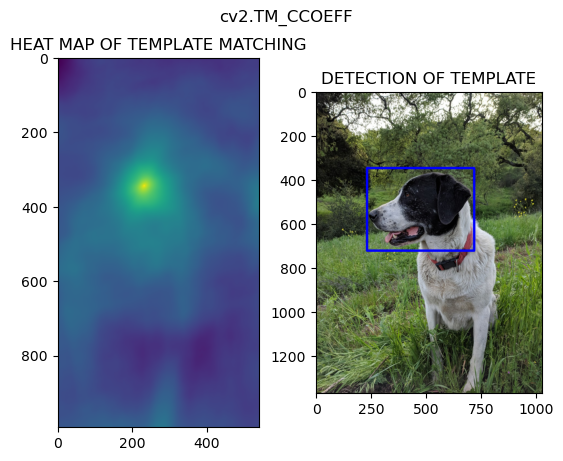

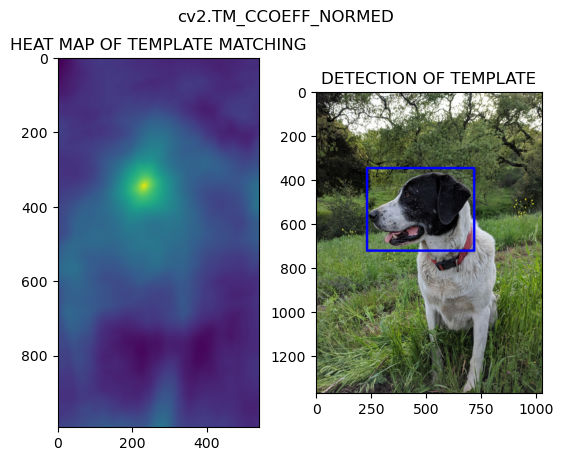

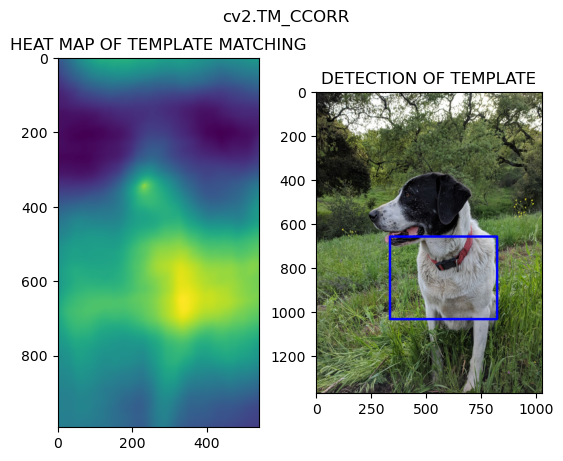

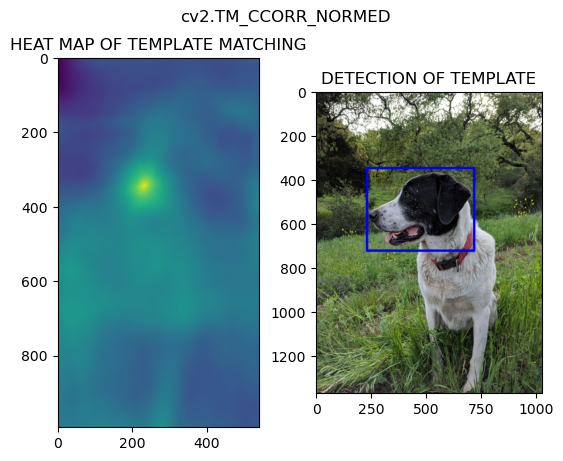

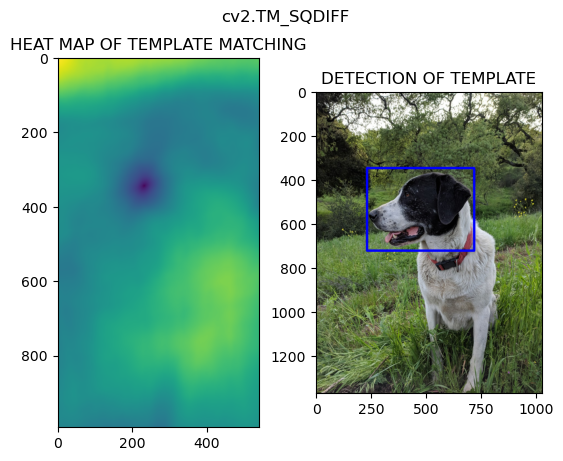

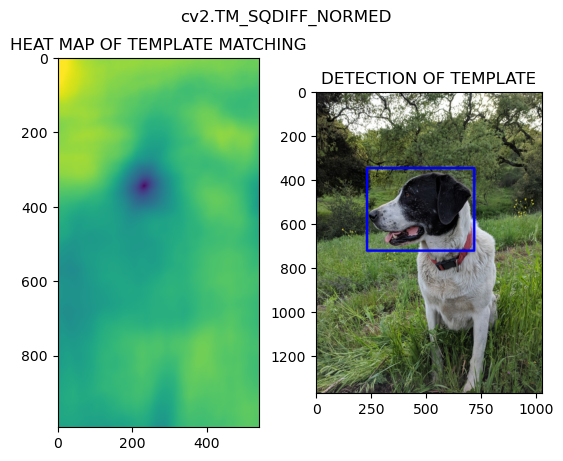

In [23]:
for m in methods:
    #CREATE A COPY OF THE IMAGE
    full_copy = full.copy()
    method = eval(m)

    #TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    # Shape of the rectangle
    height, width, channels = face.shape
    bottom_right =  (top_left[0] + width, top_left[1]+height)
    cv2.rectangle(full_copy, top_left, bottom_right, color= (0,0,255), thickness=10)

    #PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEAT MAP OF TEMPLATE MATCHING")
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATE")
    #TITLE WITH THE METHOD
    plt.suptitle(m)
    plt.show()
    print('\n')
    

In [14]:
cv2.__version__

'4.10.0'